In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style
import matplotlib as mpl
mpl.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df = pd.read_csv('returns.csv')
df.drop(['Unnamed: 0'], axis=1)
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.index = df['Date']

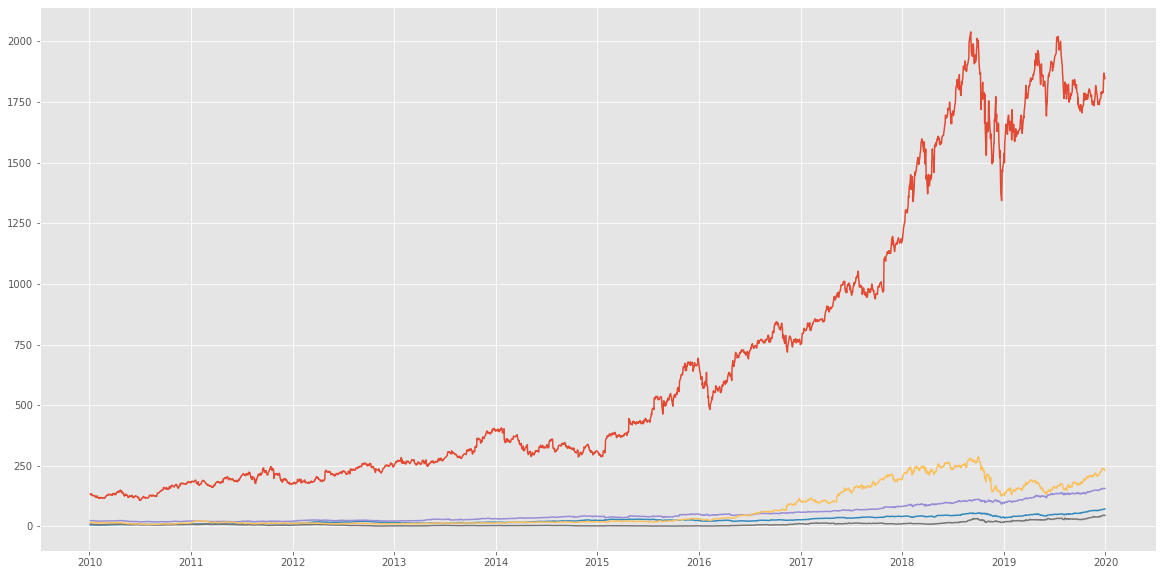

In [2]:
i = ['Close_AMZN', 'Close_AAPL', 'Close_MSFT','Close_AMD','Close_NVDA']
for stock in i:
    plt.plot(df['Date'],df[stock], label='Returns')

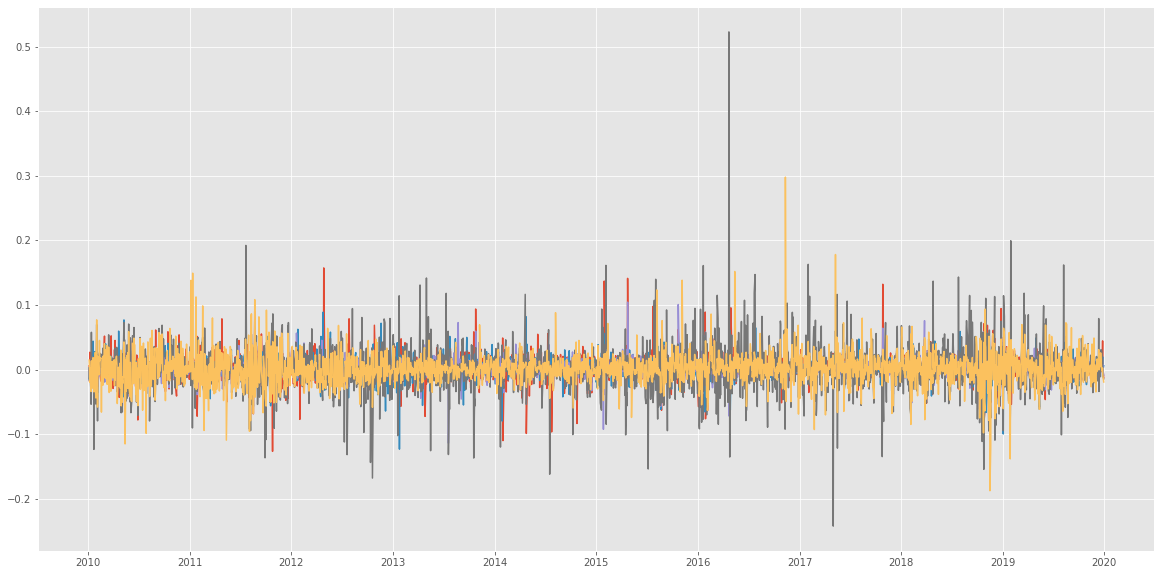

In [3]:
i = ['Return_AMZN', 'Return_AAPL', 'Return_MSFT','Return_AMD','Return_NVDA']
for ret in i:
    plt.plot(df['Date'],df[ret], label='Returns')

In [4]:
data = df.sort_index(ascending=True, axis=0)
ma_data = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close_AMZN'])

for i in range(0, len(data)):
    ma_data['Date'][i] = data['Date'][i]
    ma_data['Close_AMZN'][i] = data['Close_AMZN'][i]
  
#Let's break up the data

train = ma_data[:1820]
test = ma_data[1820:]
num = test.shape[0]

train['Date'].min(), train['Date'].max(), test['Date'].min(), test['Date'].max()

#Let's see the predictions now

preds = []
for i in range(0, num):
    a = train['Close_AMZN'][len(train)-910+i:].sum() + sum(preds)
    b = a/num
    preds.append(b)


In [5]:
movavg_rms = np.sqrt(np.mean(np.power((np.array(test['Close_AMZN'])-preds),2)))
movavg_rms

682.9657443992717

/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


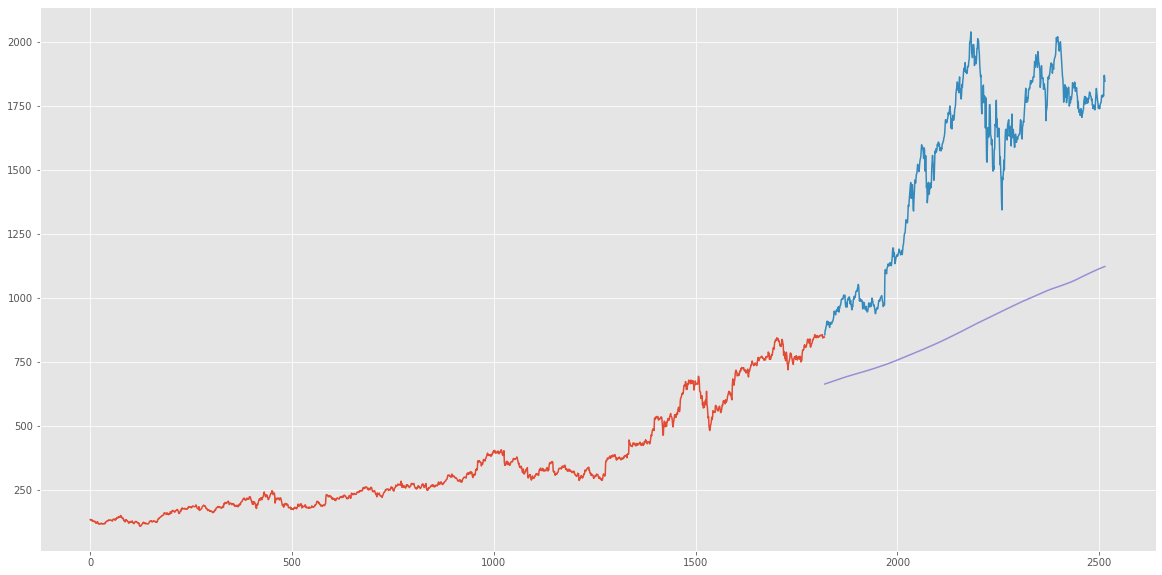

In [6]:
test['Predictions']=0
test['Predictions']=preds
plt.plot(train['Close_AMZN'])
plt.plot(test[['Close_AMZN','Predictions']])

7.688899941602849


/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


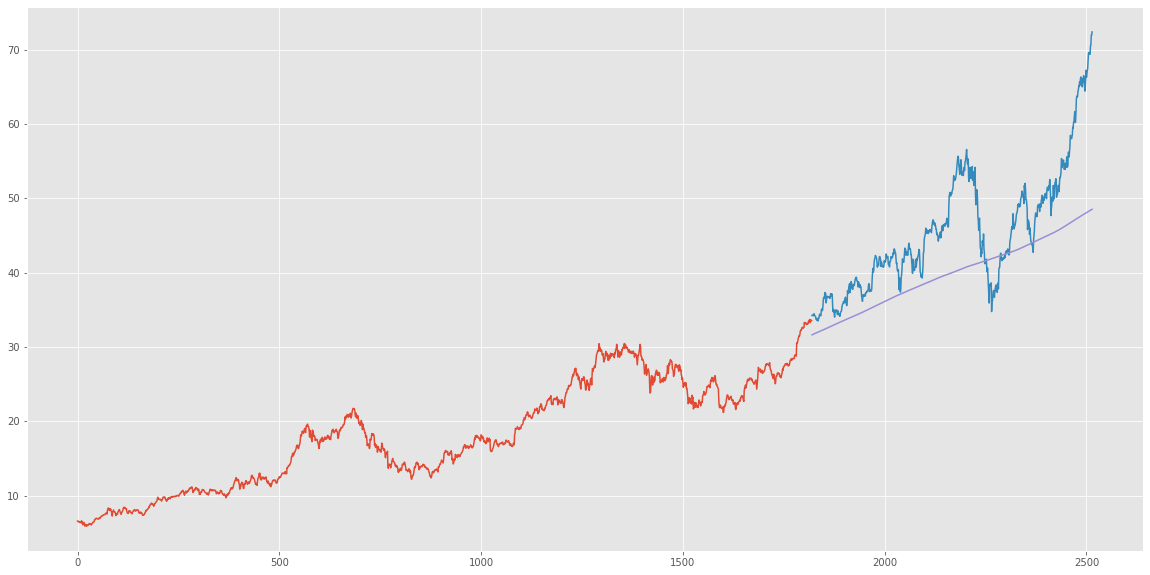

In [7]:
data = df.sort_index(ascending=True, axis=0)
ma_data = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close_AAPL'])

for i in range(0, len(data)):
    ma_data['Date'][i] = data['Date'][i]
    ma_data['Close_AAPL'][i] = data['Close_AAPL'][i]
  

train = ma_data[:1820]
test = ma_data[1820:]

num = test.shape[0]

train['Date'].min(), train['Date'].max(), test['Date'].min(), test['Date'].max()



preds = []
for i in range(0, num):
    a = train['Close_AAPL'][len(train)-924+i:].sum() + sum(preds)
    b = a/num
    preds.append(b)
    
rms = np.sqrt(np.mean(np.power((np.array(test['Close_AAPL'])-preds),2)))
print(rms)

test['Predictions']=0
test['Predictions']=preds
plt.plot(train['Close_AAPL'])
plt.plot(test[['Close_AAPL','Predictions']])

133.8750386221554


/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


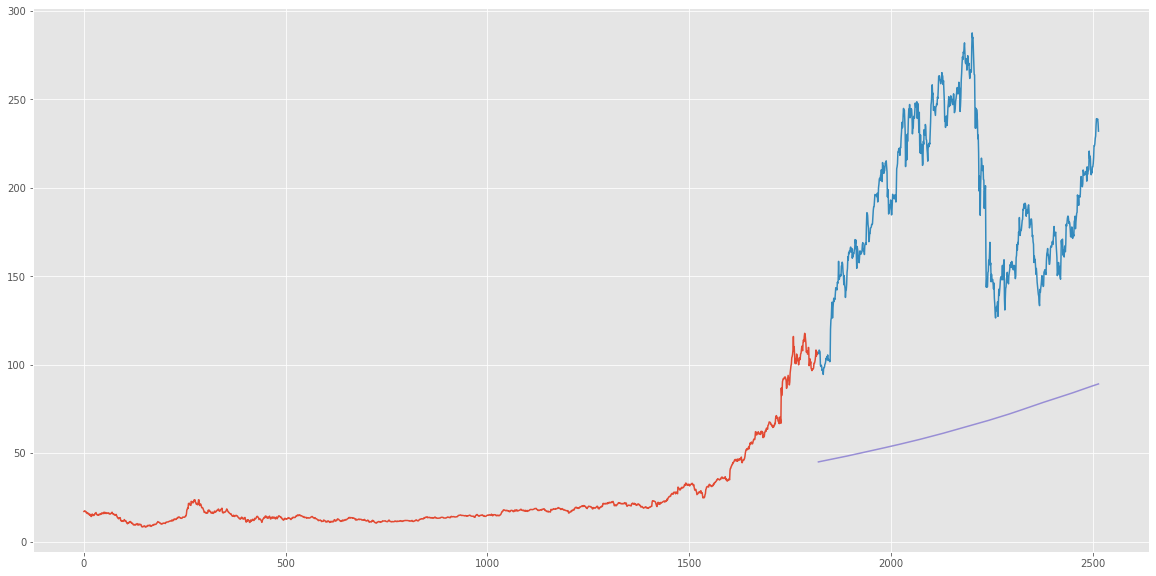

In [8]:
data = df.sort_index(ascending=True, axis=0)
ma_data = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close_NVDA'])

for i in range(0, len(data)):
    ma_data['Date'][i] = data['Date'][i]
    ma_data['Close_NVDA'][i] = data['Close_NVDA'][i]
  

train = ma_data[:1820]
test = ma_data[1820:]

num = test.shape[0]

train['Date'].min(), train['Date'].max(), test['Date'].min(), test['Date'].max()


preds = []
for i in range(0, num):
    a = train['Close_NVDA'][len(train)-924+i:].sum() + sum(preds)
    b = a/num
    preds.append(b)
    
rms = np.sqrt(np.mean(np.power((np.array(test['Close_NVDA'])-preds),2)))
print(rms)

test['Predictions']=0
test['Predictions']=preds
plt.plot(train['Close_NVDA'])
plt.plot(test[['Close_NVDA','Predictions']])

774.3142539750659


/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


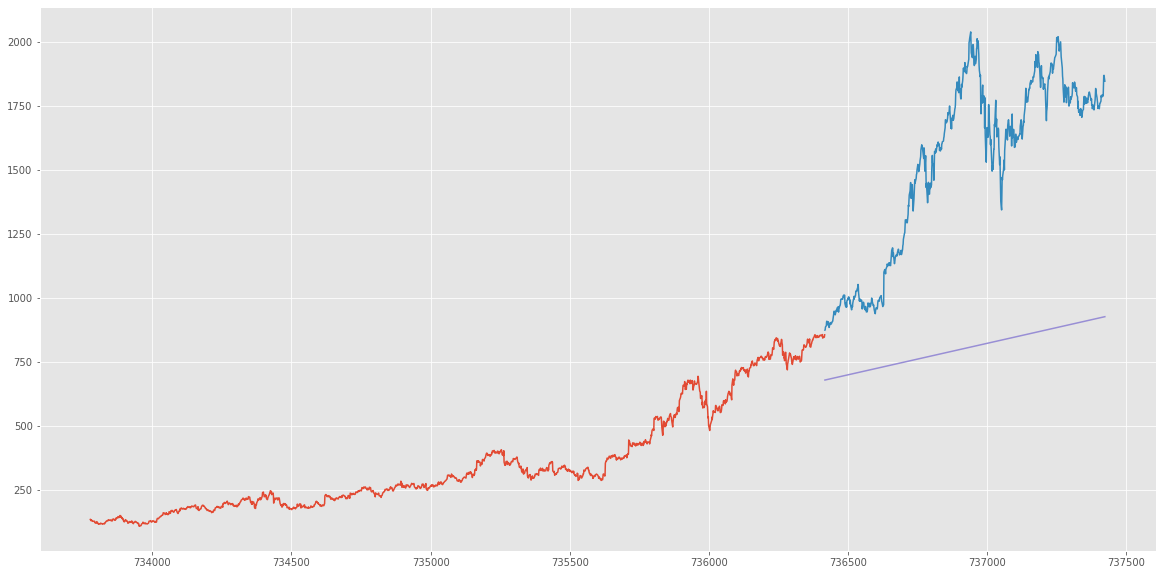

In [9]:
import datetime as dt
from sklearn.linear_model import LinearRegression

lr_data = df
lr_data['Date'] = pd.to_datetime(lr_data.Date, format='%Y-%m-%d')
lr_data['Date']=lr_data['Date'].map(dt.datetime.toordinal)
lr_data.index = lr_data['Date']
lr_data = lr_data.sort_index(ascending=True, axis=0)
lr_data = lr_data.dropna()

train = lr_data[:1820]
test = lr_data[1820:]

x_train = train['Date']
x_train = np.array(x_train)
x_train = x_train.reshape(-1, 1)
y_train = train['Close_AMZN']
x_test = test['Date']
x_test = np.array(x_test)
x_test = x_test.reshape(-1, 1)
y_test = test['Close_AMZN']

model = LinearRegression()
model.fit(x_train, y_train)

preds = model.predict(x_test)
lr_rms = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
print(lr_rms)

test['Predictions'] = 0
test['Predictions'] = preds

plt.plot(train['Close_AMZN'])
plt.plot(test['Close_AMZN'])
plt.plot(test['Predictions'])

13.296865532951967


/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


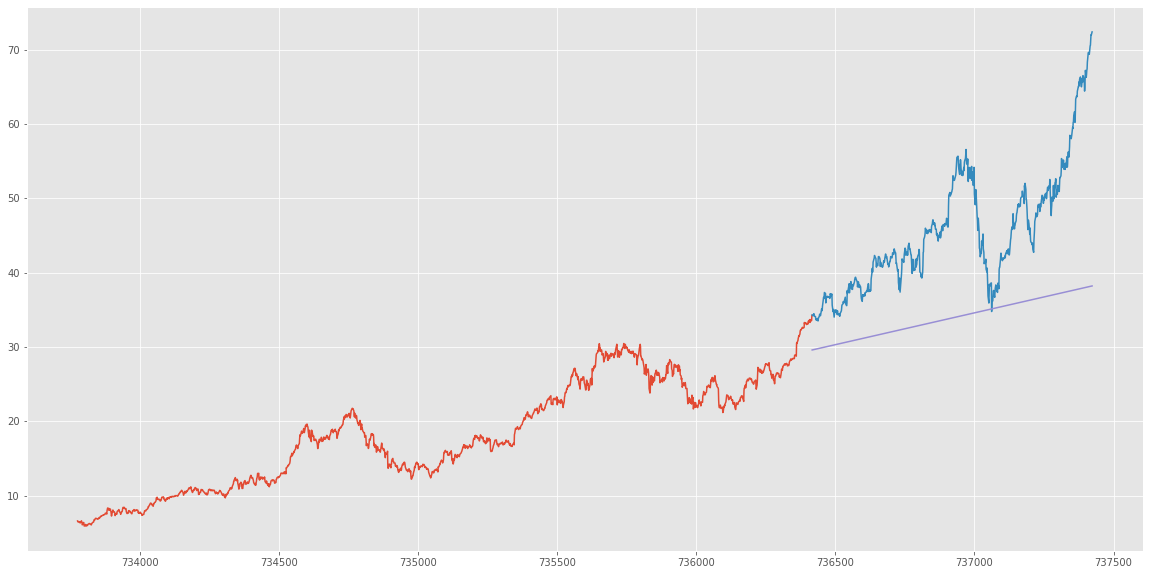

In [10]:
df = pd.read_csv('returns.csv')
df.drop(['Unnamed: 0'], axis=1)
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.index = df['Date']
lr_data = df
lr_data['Date'] = pd.to_datetime(lr_data.Date, format='%Y-%m-%d')
lr_data['Date']=lr_data['Date'].map(dt.datetime.toordinal)
lr_data.index = lr_data['Date']
lr_data = lr_data.sort_index(ascending=True, axis=0)
lr_data = lr_data.dropna()

train = lr_data[:1820]
test = lr_data[1820:]

x_train = train['Date']
x_train = np.array(x_train)
x_train = x_train.reshape(-1, 1)
y_train = train['Close_AAPL']
x_test = test['Date']
x_test = np.array(x_test)
x_test = x_test.reshape(-1, 1)
y_test = test['Close_AAPL']


model = LinearRegression()
model.fit(x_train, y_train)

preds = model.predict(x_test)
lr_rms = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
print(lr_rms)

test['Predictions'] = 0
test['Predictions'] = preds


plt.plot(train['Close_AAPL'])
plt.plot(test['Close_AAPL'])
plt.plot(test['Predictions'])

In [11]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df = pd.read_csv('returns.csv')
df.drop(['Unnamed: 0'], axis=1)
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.index = df['Date']
knn_data = df
knn_data['Date'] = pd.to_datetime(knn_data.Date, format='%Y-%m-%d')
knn_data['Date']=knn_data['Date'].map(dt.datetime.toordinal)
knn_data.index = knn_data['Date']
knn_data = knn_data.sort_index(ascending=True, axis=0)
knn_data = knn_data.dropna()

train = knn_data[:1820]
test = knn_data[1820:]

x_train = train['Date']
x_train = np.array(x_train)
x_train = x_train.reshape(-1, 1)
y_train = train['Close_AMZN']
x_test = test['Date']
x_test = np.array(x_test)
x_test = x_test.reshape(-1, 1)
y_test = test['Close_AMZN']

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)


params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

model.fit(x_train, y_train)
preds = model.predict(x_test)

In [12]:
preds = model.predict(x_test)
knn_rms = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
print(knn_rms)

1193.898428542308


/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


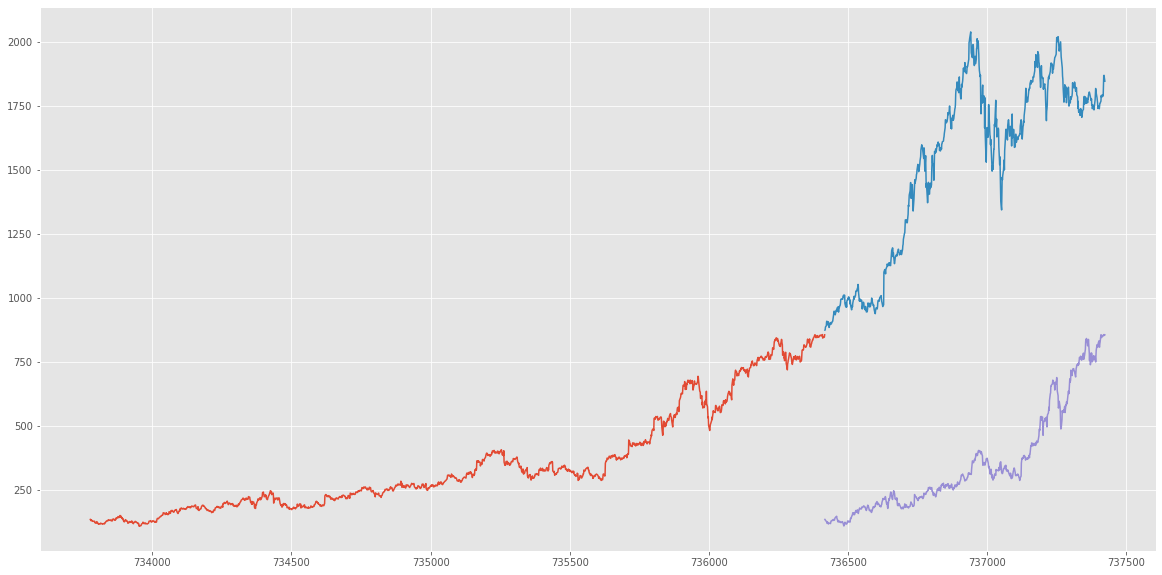

In [13]:
test['Predictions'] = 0
test['Predictions'] = preds

plt.plot(train['Close_AMZN'])
plt.plot(test['Close_AMZN'])
plt.plot(test['Predictions'])

In [14]:
import xgboost as xgb
from xgboost import XGBClassifier
df = pd.read_csv('returns.csv')
df.drop(['Unnamed: 0'], axis=1)

df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.index = df['Date']
xg_data = df

xg_data['Date'] = pd.to_datetime(xg_data.Date, format='%Y-%m-%d')
xg_data['Date']=xg_data['Date'].map(dt.datetime.toordinal)

xg_data.index = xg_data['Date']
xg_data = xg_data.sort_index(ascending=True, axis=0)
xg_data = xg_data.dropna()

964.4248212782323


/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


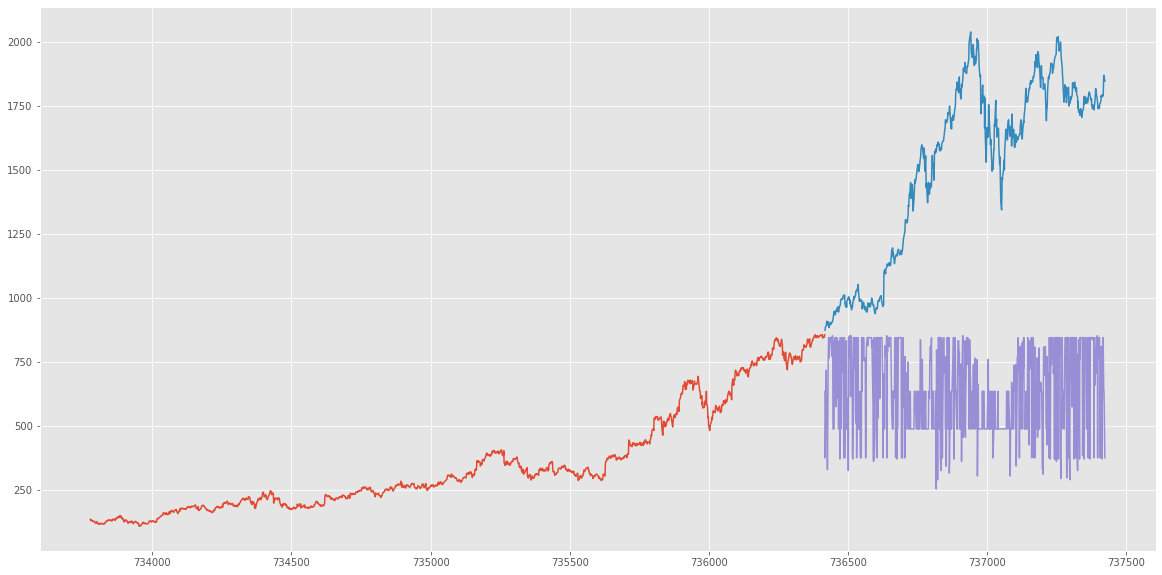

In [15]:
train = xg_data[:1820]
test = xg_data[1820:]
x_train = train[['Date','Volume_AMZN']]
y_train = train['Close_AMZN']
x_test = test[['Date','Volume_AMZN']]
y_test = test['Close_AMZN']

model = XGBClassifier()
model.fit(x_train, y_train)


model.fit(x_train, y_train)
preds = model.predict(x_test)

preds = model.predict(x_test)
xg_rms = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
print(xg_rms)

test['Predictions'] = 0
test['Predictions'] = preds


plt.plot(train['Close_AMZN'])
plt.plot(test['Close_AMZN'])
plt.plot(test['Predictions'])

16.453801519346232


/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


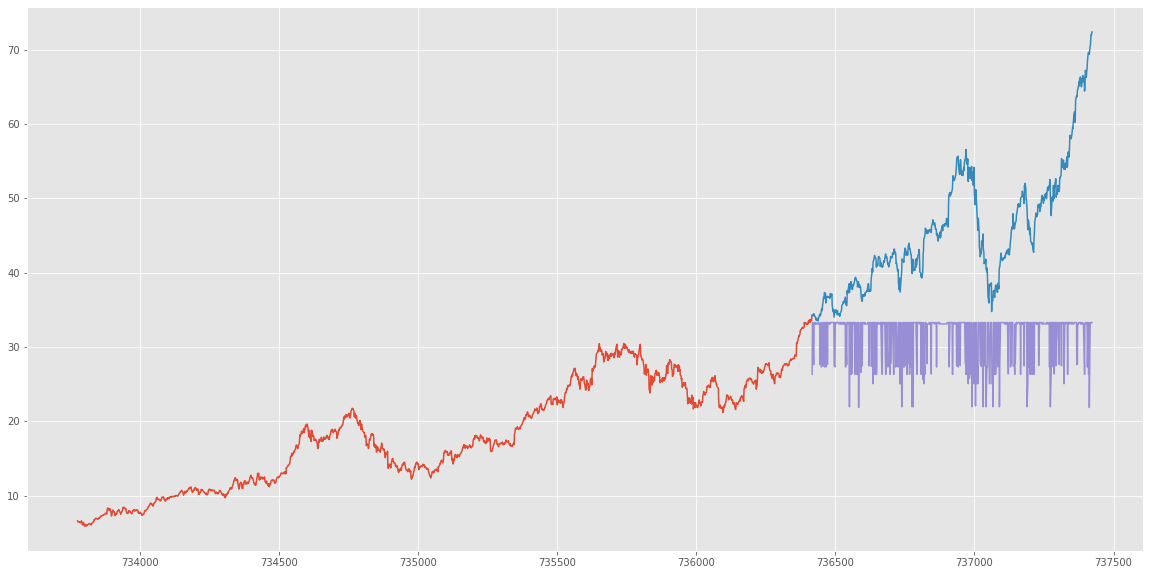

In [16]:
df = pd.read_csv('returns.csv')
df.drop(['Unnamed: 0'], axis=1)

df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.index = df['Date']
xg_data = df

xg_data['Date'] = pd.to_datetime(xg_data.Date, format='%Y-%m-%d')
xg_data['Date']=xg_data['Date'].map(dt.datetime.toordinal)

xg_data.index = xg_data['Date']
xg_data = xg_data.sort_index(ascending=True, axis=0)
xg_data = xg_data.dropna()
train = xg_data[:1820]
test = xg_data[1820:]
x_train = train[['Date','Volume_AAPL']]
y_train = train['Close_AAPL']
x_test = test[['Date','Volume_AAPL']]
y_test = test['Close_AAPL']

model = XGBClassifier()
model.fit(x_train, y_train)

model.fit(x_train, y_train)
preds = model.predict(x_test)

preds = model.predict(x_test)
xg_rms = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
print(xg_rms)

test['Predictions'] = 0
test['Predictions'] = preds

plt.plot(train['Close_AAPL'])
plt.plot(test['Close_AAPL'])
plt.plot(test['Predictions'])

In [17]:
#LSTM
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM

dataset = df.values
training_data_len = math.ceil( len(dataset) *.8) 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
train_data = scaled_data[0:training_data_len  , : ]
x_train=[]
y_train = []
for i in range(1820,len(train_data)):
    x_train.append(train_data[i-1820:i,0])
    y_train.append(train_data[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

#Let's build the model network 
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))



Using TensorFlow backend.
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/nich

In [18]:
test_data = scaled_data[training_data_len - 1820: , : ]

x_test = []
y_test =  dataset[training_data_len : , : ]  
for i in range(1820,len(test_data)):
    x_test.append(test_data[i-1820:i,0])



2055.929399961741


/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


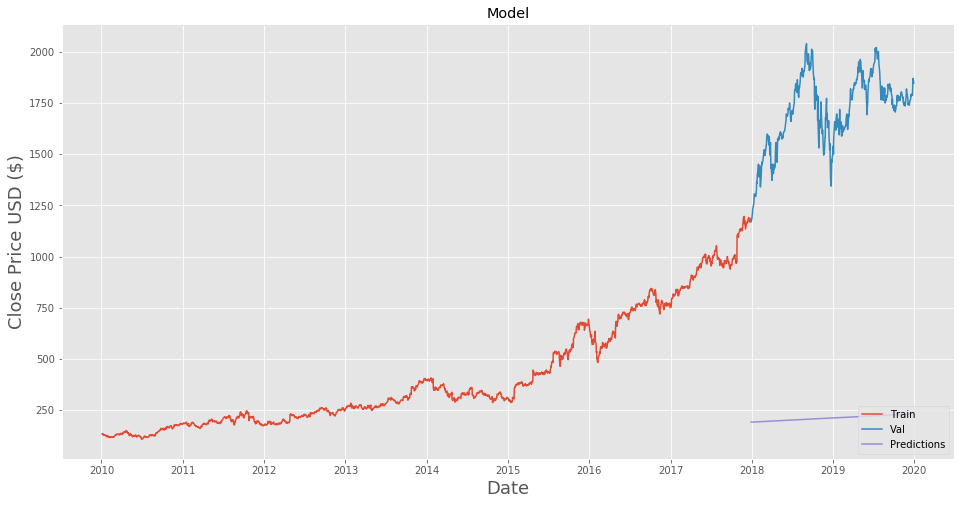

In [19]:
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

predictions = model.predict(x_test) 

trainPredict_dataset_like = np.zeros(shape=(len(predictions), 22) )

trainPredict_dataset_like[:,0] = predictions[:,0]


predictions = scaler.inverse_transform(trainPredict_dataset_like)#Undo scaling
predictions = predictions[:,0]


y_test = y_test[:,0]
lstm_rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(lstm_rmse)

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close_AMZN'])
plt.plot(valid[['Close_AMZN', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima
import warnings

In [21]:
dateparser = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('returns.csv', index_col='Date', parse_dates=['Date'], date_parser=dateparser)
adfuller_result = adfuller(data['Open_AMZN'])
print('ADF Statistic: ', adfuller_result[0])
print('p-value: ', adfuller_result[1])

ADF Statistic:  0.801197105709615
p-value:  0.9916554669997957


/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [22]:
data = data.astype('float')
data_diff = data.diff().dropna()
diff_adfuller_result = adfuller(data_diff['Open_AMZN'])
print('p-value: ', diff_adfuller_result[1])

p-value:  5.235699163236677e-19


In [23]:
data_diffdiff = data.diff().diff().dropna()
sqrt_adfuller_result = adfuller(data_diffdiff['Open_AMZN'])
print('Square Root Method ADF Statistic: ', sqrt_adfuller_result[0])
print('p-value: ', sqrt_adfuller_result[1])

Square Root Method ADF Statistic:  -15.74401994030052
p-value:  1.2459944151674165e-28


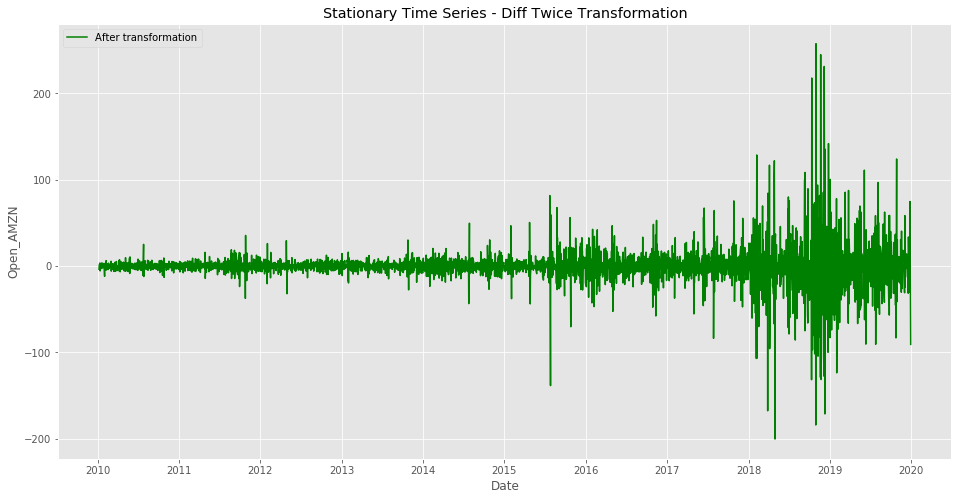

In [24]:
import seaborn as sns
plt.figure(figsize=(16,8))
sns.lineplot(x=data_diffdiff.index, y='Open_AMZN', data=data_diffdiff, label='After transformation', color='green').set_title('Stationary Time Series - Diff Twice Transformation')
plt.show()

In [25]:
train_data = data.loc['2010':'2019']
test_data = data.loc['2019':'2020']

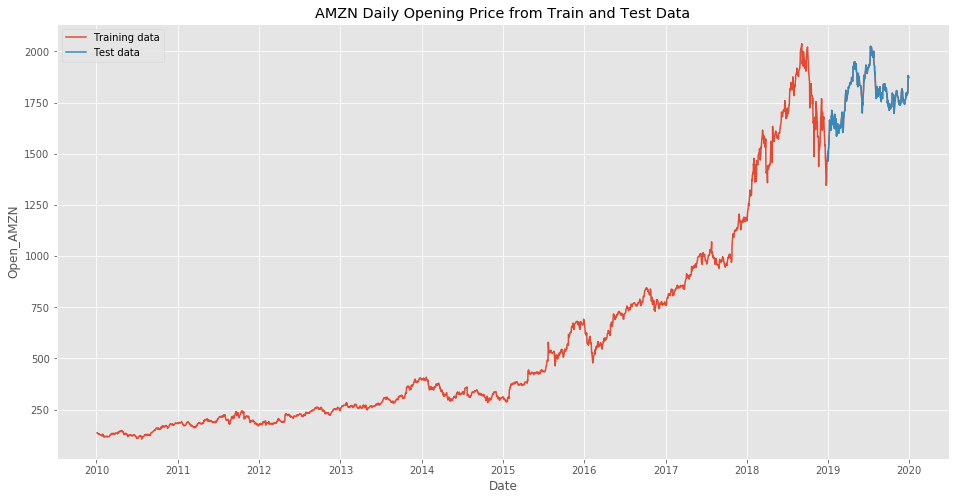

In [26]:
plt.figure(figsize=(16,8))
sns.lineplot(x=train_data.index, y='Open_AMZN', data=train_data, linewidth=1.5, label='Training data').set_title('AMZN Daily Opening Price from Train and Test Data')
sns.lineplot(x=test_data.index, y='Open_AMZN', data=test_data, linewidth=1.5, label='Test data')
plt.show()

In [36]:
model = SARIMAX(train_data['Open_AMZN'], order=(0,2,1), trend= 'c')
results = model.fit()

preds = results.get_prediction(start=-520, dynamic=False)

preds_mean = preds.predicted_mean
preds_mean_df = preds_mean.to_frame(name='forecasted_mean')

print(preds_mean_df)
# Need confidence intervals for plot
confidence_intervals = preds.conf_int()
lower_limits = confidence_intervals.loc[:,'lower Open_AMZN']
upper_limits = confidence_intervals.loc[:,'upper Open_AMZN']

/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


            forecasted_mean
Date                       
2017-12-05      1174.987388
2017-12-06      1129.374562
2017-12-07      1139.109501
2017-12-08      1157.718881
2017-12-11      1171.535852
...                     ...
2019-12-23      1801.059148
2019-12-24      1789.694659
2019-12-26      1795.246919
2019-12-27      1802.449836
2019-12-30      1884.392524

[520 rows x 1 columns]


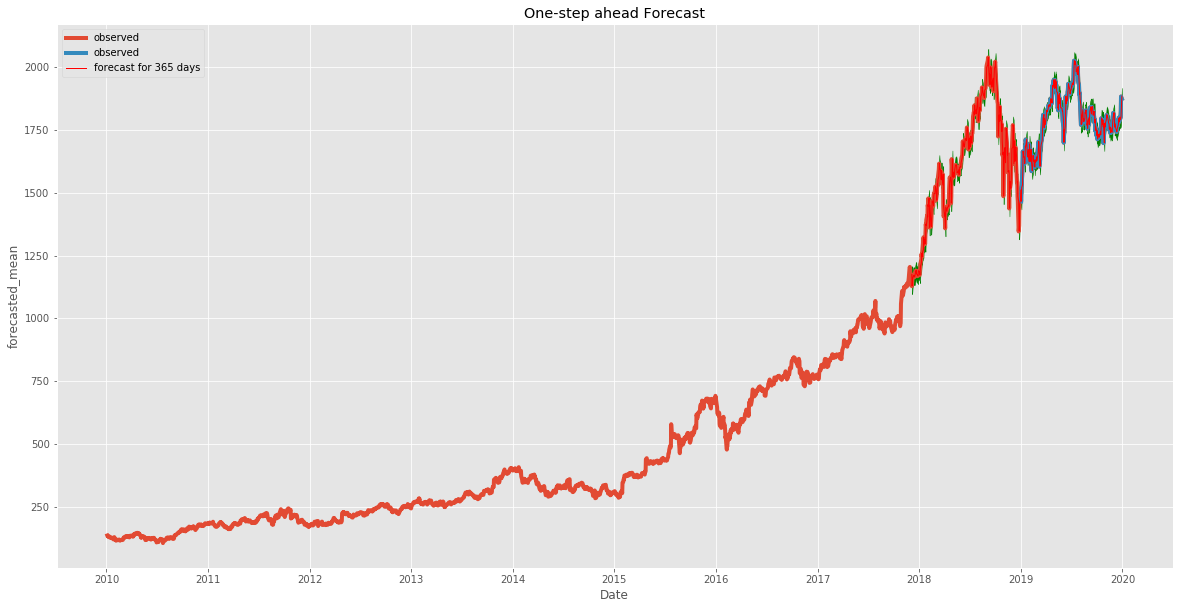

In [37]:
plt.figure(figsize=(20,10))
sns.lineplot(x=train_data.index, y='Open_AMZN', data=train_data, linewidth=4, label='observed').set_title('One-step ahead Forecast')
sns.lineplot(x=test_data.index, y='Open_AMZN', data=test_data, linewidth=4, label='observed').set_title('One-step ahead Forecast')
sns.lineplot(x=preds_mean_df.index, y=preds_mean_df['forecasted_mean'], data=preds_mean_df, linewidth=1, label='forecast for 365 days', color='red')

#confidence intervals
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='green')

In [38]:
y_test = test_data['Open_AMZN']
mse = ((preds_mean - y_test) ** 2).mean()
arima_rmse = np.sqrt(mse)
print(arima_rmse)

25.460426487390315


In [39]:
model_performance = pd.DataFrame({'Model': ['Moving Average', 'Linear Regression',
                                                      'KNeighborsClassifier',
                                                      'XGBoost','LSTM','ARIMA'],
                                            
                                            
                                            'RMSE': [movavg_rms,lr_rms,
                                                         knn_rms,
                                                         xg_rms,lstm_rmse,arima_rmse]})


print(model_performance)

                  Model         RMSE
0        Moving Average   682.965744
1     Linear Regression    13.296866
2  KNeighborsClassifier  1193.898429
3               XGBoost    16.453802
4                  LSTM  2055.929400
5                 ARIMA    25.460426
